In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
!pip install --upgrade scikit-learn imbalanced-learn

In [ ]:
!pip install -U scikit-learn imbalanced-learn

In [5]:
import numpy as np
import pandas as pd
import os
import glob
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.auto import tqdm

sns.set_style('darkgrid')

In [6]:
DATA_DIR = "/kaggle/input/olid-i/"

image_paths = []
extensions = ['*.JPG', '*.jpg', '*.png', '*.jpeg']
for ext in extensions:
    image_paths.extend(glob.glob(os.path.join(DATA_DIR, '*', ext)))

print(f"Found {len(image_paths)} image paths.")

data = []
for path in tqdm(image_paths):
    try:
        label = os.path.basename(os.path.dirname(path))
        data.append({'image_path': path, 'label': label})
    except Exception as e:
        print(f"Error processing {path}: {e}")

df = pd.DataFrame(data)

print("\nDataFrame Head:")
print(df.head())

print(f"\nSample Path: {df['image_path'].iloc[0]}")
print(f"Sample Label: {df['label'].iloc[0]}")

Found 4749 image paths.


  0%|          | 0/4749 [00:00<?, ?it/s]


DataFrame Head:
                                          image_path          label
0  /kaggle/input/olid-i/ash_gourd__PM/ash_gourd__...  ash_gourd__PM
1  /kaggle/input/olid-i/ash_gourd__PM/ash_gourd__...  ash_gourd__PM
2  /kaggle/input/olid-i/ash_gourd__PM/ash_gourd__...  ash_gourd__PM
3  /kaggle/input/olid-i/ash_gourd__PM/ash_gourd__...  ash_gourd__PM
4  /kaggle/input/olid-i/ash_gourd__PM/ash_gourd__...  ash_gourd__PM

Sample Path: /kaggle/input/olid-i/ash_gourd__PM/ash_gourd__PM (79).JPG
Sample Label: ash_gourd__PM



--- Dataset Analysis ---
Total number of images: 4749
Total number of classes: 57

Class Distribution (Value Counts):
label
ash_gourd__N_K           386
ash_gourd__K             293
tomato__healthy          236
tomato__LM               207
snake_gourd__N_K         206
tomato__MIT              200
bitter_gourd__healthy    181
ridge_gourd__N           152
bitter_gourd__N          147
bitter_gourd__N_K        128
bitter_gourd__N_Mg       116
eggplant__K              106
eggplant__N_K            106
snake_gourd__N           102
bottle_gourd__N_K        102
eggplant__MIT_EB          95
eggplant__healthy         92
cucumber__N               89
ash_gourd__healthy        83
ridge_gourd__PLEI         80
ash_gourd__PM             79
cucumber__N_K             76
eggplant__MIT             75
eggplant__EB              74
ridge_gourd__healthy      70
eggplant__N               67
ash_gourd__N              61
snake_gourd__healthy      59
snake_gourd__K            56
bitter_gourd__K           55
ash_g

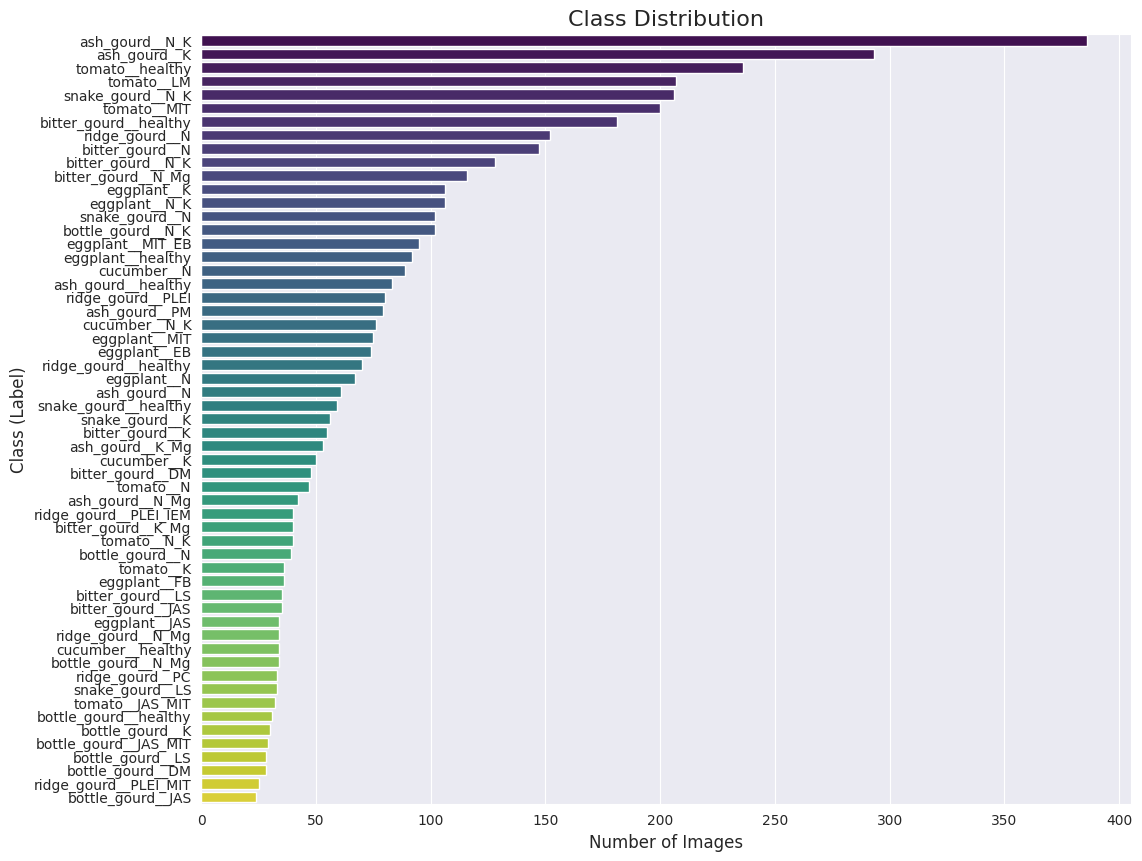

In [7]:
print("\n--- Dataset Analysis ---")
print(f"Total number of images: {len(df)}")
num_classes = df['label'].nunique()
print(f"Total number of classes: {num_classes}")

print("\nClass Distribution (Value Counts):")
print(df['label'].value_counts())

plt.figure(figsize=(12, 10))
sns.countplot(y='label', data=df, order=df['label'].value_counts().index, palette='viridis')
plt.title('Class Distribution', fontsize=16)
plt.xlabel('Number of Images', fontsize=12)
plt.ylabel('Class (Label)', fontsize=12)
plt.show()


--- Single Image Inspection ---
Successfully read image: /kaggle/input/olid-i/ash_gourd__PM/ash_gourd__PM (43).JPG
Image shape: (3024, 3024, 3)


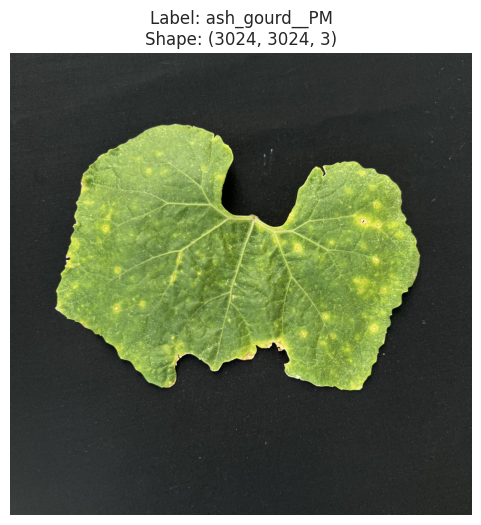


--- Grid of Sample Images ---


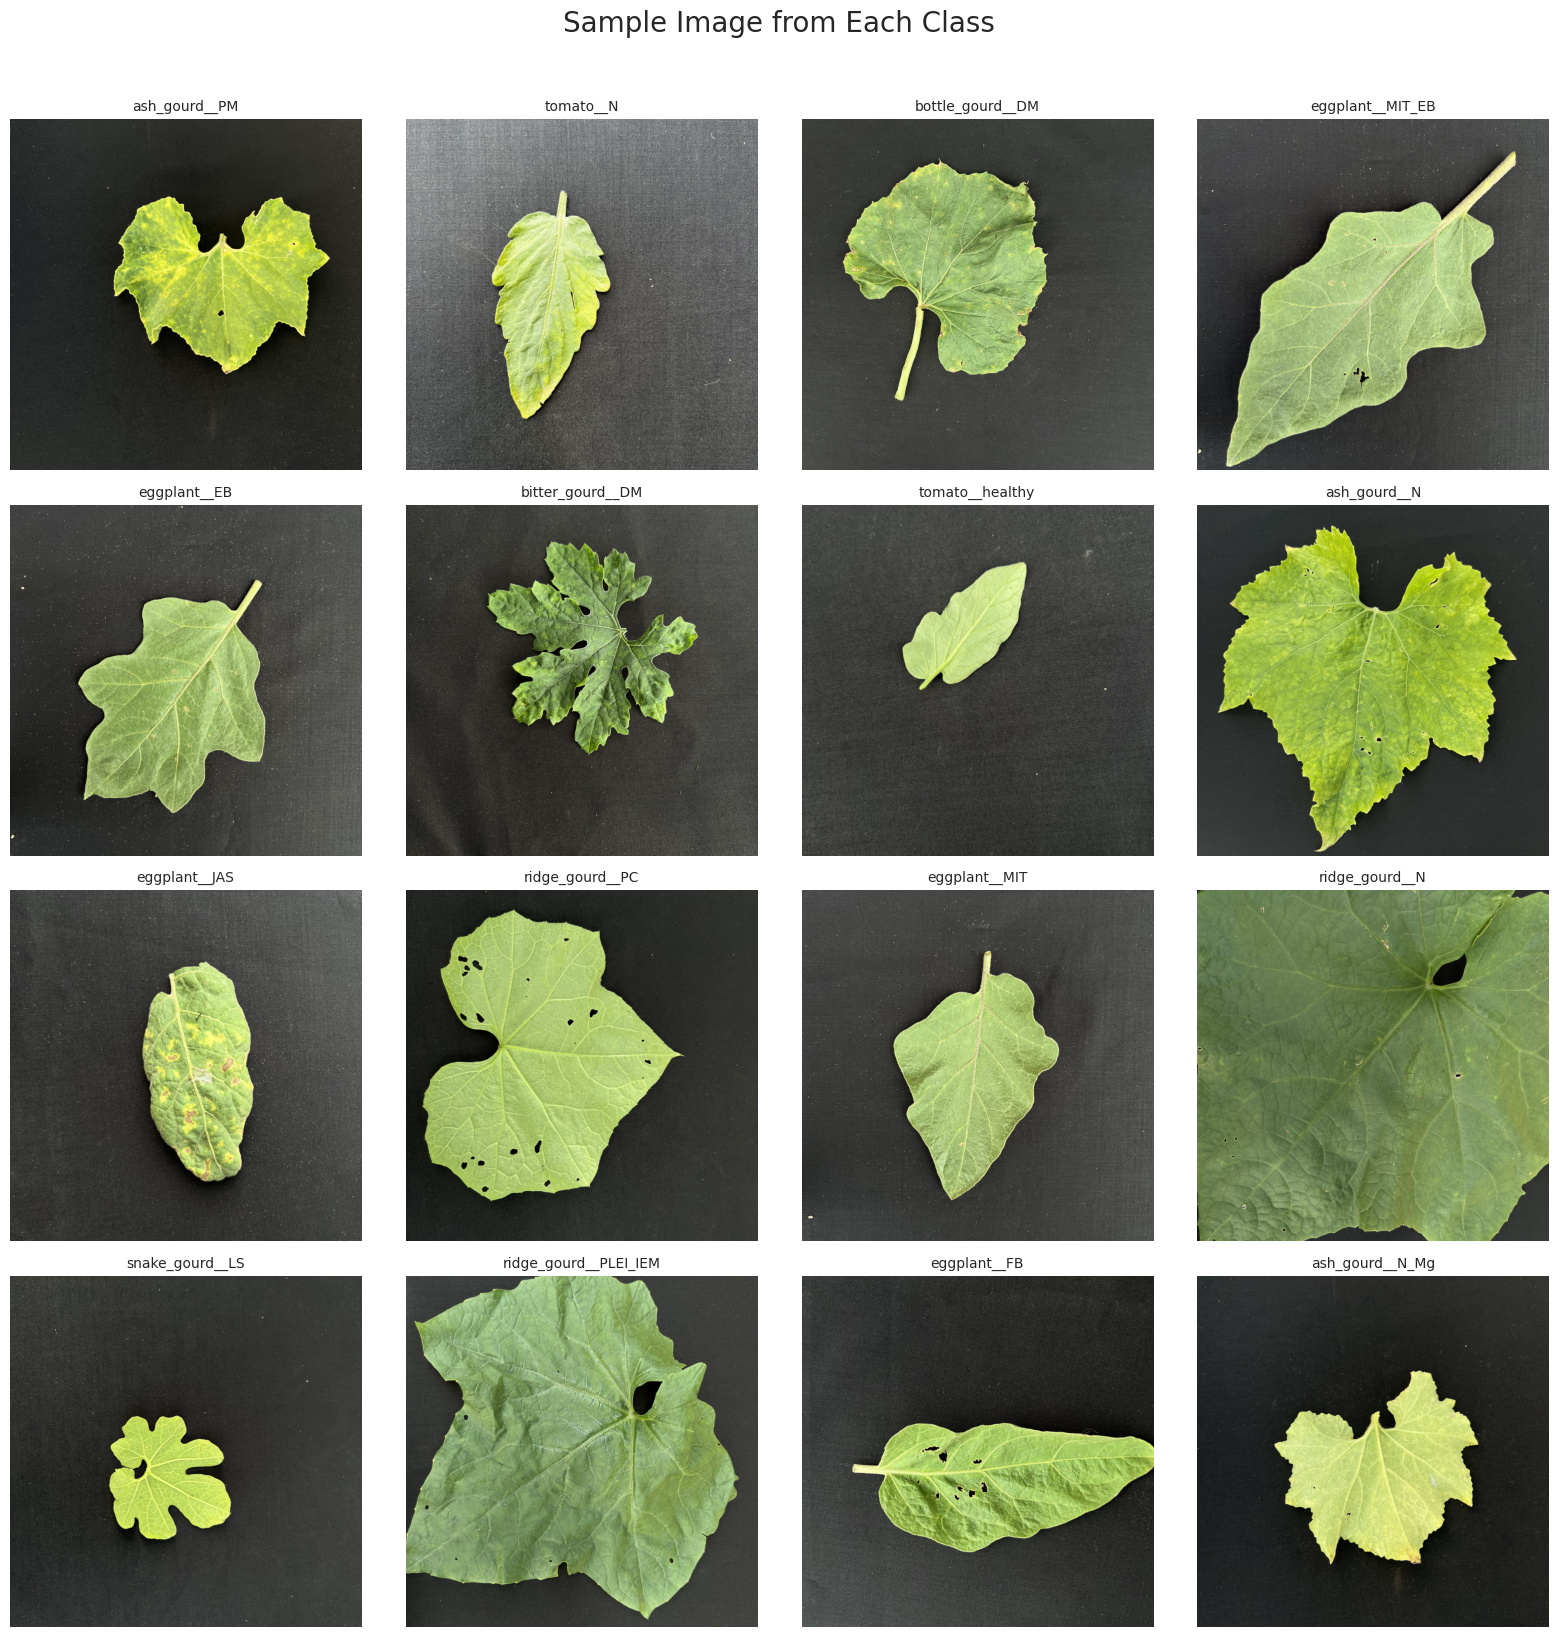

In [8]:
print("\n--- Single Image Inspection ---")
sample_row = df.iloc[5] 
sample_path = sample_row['image_path']
sample_label = sample_row['label']

image_bgr = cv2.imread(sample_path)

if image_bgr is not None:
    print(f"Successfully read image: {sample_path}")
    
    print(f"Image shape: {image_bgr.shape}")
    
    image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)
    
    plt.figure(figsize=(6, 6))
    plt.imshow(image_rgb)
    plt.title(f"Label: {sample_label}\nShape: {image_bgr.shape}")
    plt.axis('off')
    plt.show()

else:
    print(f"Error: Could not read image at {sample_path}")

print("\n--- Grid of Sample Images ---")
unique_labels = df['label'].unique()

grid_size = min(num_classes, 16) 
cols = 4
rows = int(np.ceil(grid_size / cols))

plt.figure(figsize=(cols * 4, rows * 4))
for i, label in enumerate(unique_labels[:grid_size]):
    path = df[df['label'] == label].sample(1)['image_path'].values[0]
    
    img_bgr = cv2.imread(path)
    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
    
    plt.subplot(rows, cols, i + 1)
    plt.imshow(img_rgb)
    plt.title(label, fontsize=10)
    plt.axis('off')

plt.suptitle("Sample Image from Each Class", fontsize=20, y=1.02)
plt.tight_layout()
plt.show()

In [9]:
df[['plant_type', 'status']] = df['label'].str.split('__', n=1, expand=True)

print("--- Before Filtering ---")
print(f"Original number of images: {len(df)}")
print(f"Original number of classes: {df['label'].nunique()}")

df_filtered = df[~df['status'].str.contains('_')].copy()

print("\n--- After Filtering ---")
print(f"Dropped {len(df) - len(df_filtered)} images with composite labels.")
print(f"New total number of images: {len(df_filtered)}")
print(f"New total number of classes: {df_filtered['label'].nunique()}")

dropped_labels = set(df['label']) - set(df_filtered['label'])
print(f"\nExample labels that were dropped:\n{list(dropped_labels)[:5]}")

--- Before Filtering ---
Original number of images: 4749
Original number of classes: 57

--- After Filtering ---
Dropped 1584 images with composite labels.
New total number of images: 3165
New total number of classes: 39

Example labels that were dropped:
['snake_gourd__N_K', 'tomato__N_K', 'ash_gourd__N_K', 'bottle_gourd__JAS_MIT', 'ridge_gourd__PLEI_MIT']



--- New Class Distribution ---
label
ash_gourd__K             293
tomato__healthy          236
tomato__LM               207
tomato__MIT              200
bitter_gourd__healthy    181
ridge_gourd__N           152
bitter_gourd__N          147
eggplant__K              106
snake_gourd__N           102
eggplant__healthy         92
cucumber__N               89
ash_gourd__healthy        83
ridge_gourd__PLEI         80
ash_gourd__PM             79
eggplant__MIT             75
eggplant__EB              74
ridge_gourd__healthy      70
eggplant__N               67
ash_gourd__N              61
snake_gourd__healthy      59
snake_gourd__K            56
bitter_gourd__K           55
cucumber__K               50
bitter_gourd__DM          48
tomato__N                 47
bottle_gourd__N           39
tomato__K                 36
eggplant__FB              36
bitter_gourd__LS          35
bitter_gourd__JAS         35
eggplant__JAS             34
cucumber__healthy         34
ridge_gourd__PC           33
snake

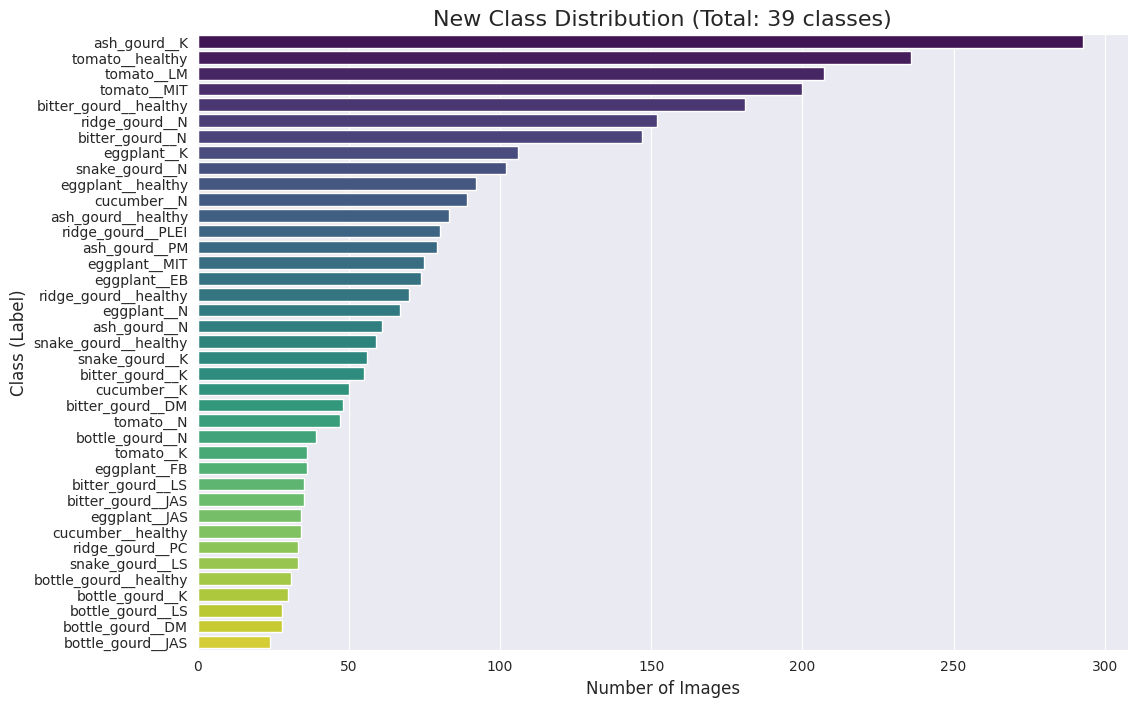

In [10]:
print("\n--- New Class Distribution ---")
print(df_filtered['label'].value_counts())

plt.figure(figsize=(12, 8))
num_new_classes = df_filtered['label'].nunique()
sns.countplot(
    y='label', 
    data=df_filtered, 
    order=df_filtered['label'].value_counts().index, 
    palette='viridis'
)
plt.title(f'New Class Distribution (Total: {num_new_classes} classes)', fontsize=16)
plt.xlabel('Number of Images', fontsize=12)
plt.ylabel('Class (Label)', fontsize=12)
plt.show()

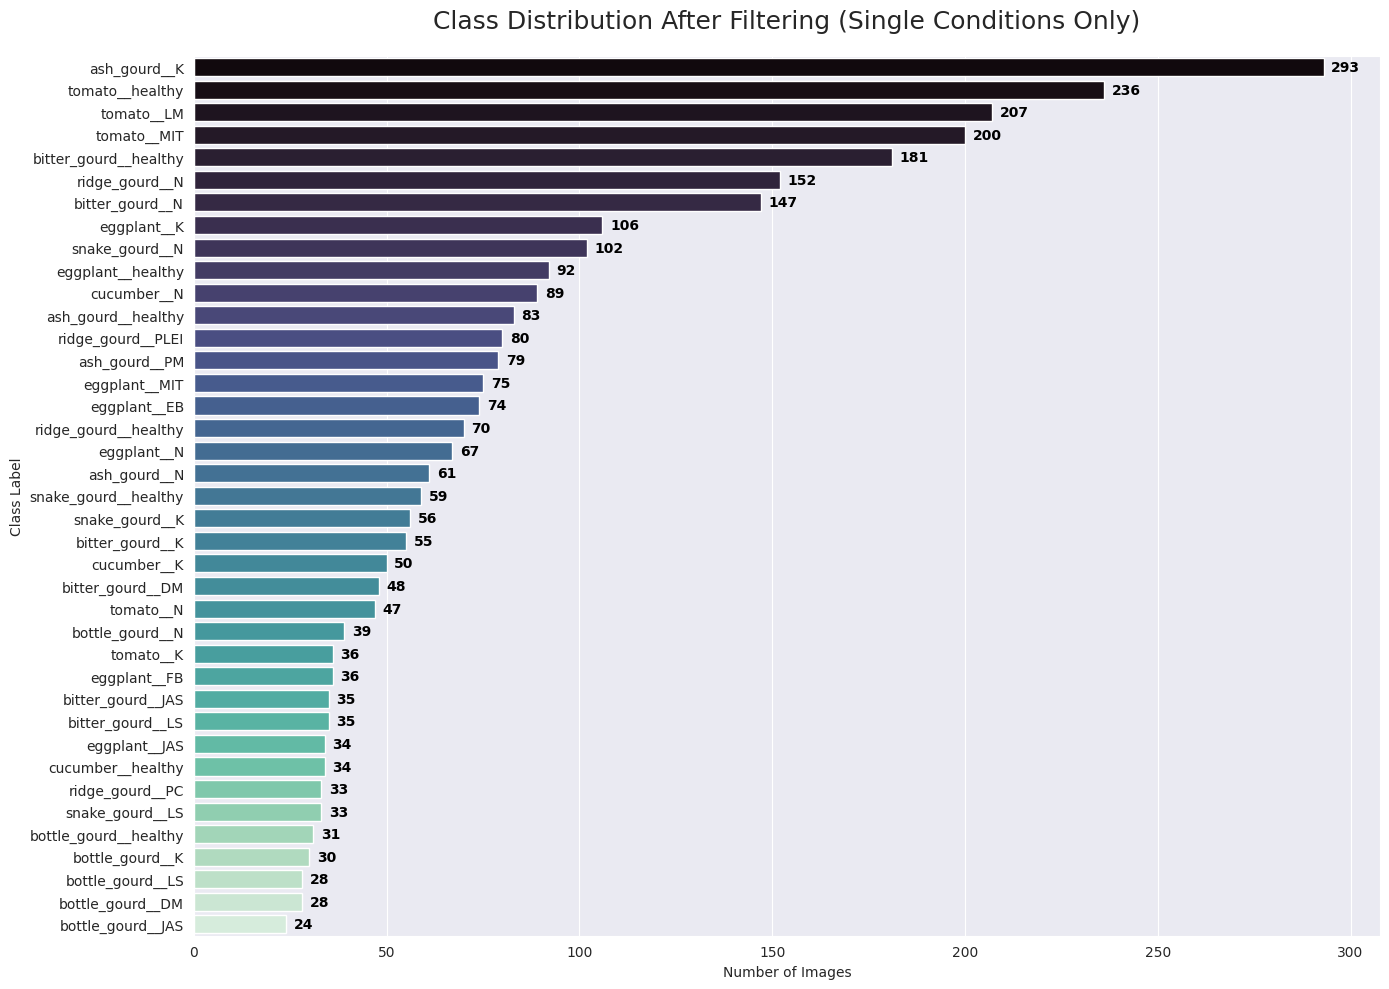

Most common class: ash_gourd__K → 293 images
Least common class: bottle_gourd__JAS → 24 images
Classes with fewer than 50 images: 16


In [11]:
plt.figure(figsize=(14, 10))
class_counts = df_filtered['label'].value_counts().sort_values(ascending=False)

ax = sns.barplot(y=class_counts.index, x=class_counts.values, palette='mako')
for i, v in enumerate(class_counts.values):
    ax.text(v + 2, i, str(v), color='black', va='center', fontweight='bold', fontsize=10)

plt.title('Class Distribution After Filtering (Single Conditions Only)', fontsize=18, pad=20)
plt.xlabel('Number of Images')
plt.ylabel('Class Label')
plt.tight_layout()
plt.show()

print(f"Most common class: {class_counts.index[0]} → {class_counts.iloc[0]} images")
print(f"Least common class: {class_counts.index[-1]} → {class_counts.iloc[-1]} images")
print(f"Classes with fewer than 50 images: {(class_counts < 50).sum()}")

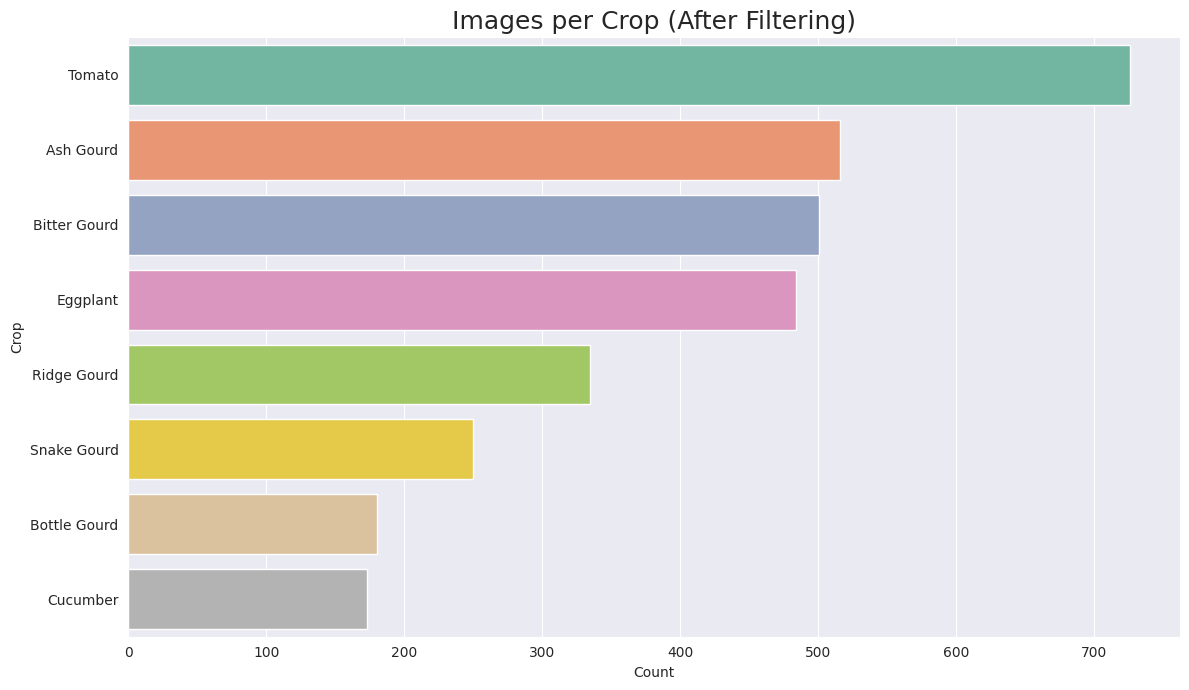

crop
Tomato          726
Ash Gourd       516
Bitter Gourd    501
Eggplant        484
Ridge Gourd     335
Snake Gourd     250
Bottle Gourd    180
Cucumber        173
Name: count, dtype: int64


In [12]:
df_filtered['crop'] = df_filtered['label'].str.split('__').str[0].str.replace('_', ' ').str.title()

plt.figure(figsize=(12, 7))
crop_order = df_filtered['crop'].value_counts().index
sns.countplot(data=df_filtered, y='crop', order=crop_order, palette='Set2') 
plt.title('Images per Crop (After Filtering)', fontsize=18)
plt.xlabel('Count')
plt.ylabel('Crop')
plt.tight_layout()
plt.show()

print(df_filtered['crop'].value_counts())

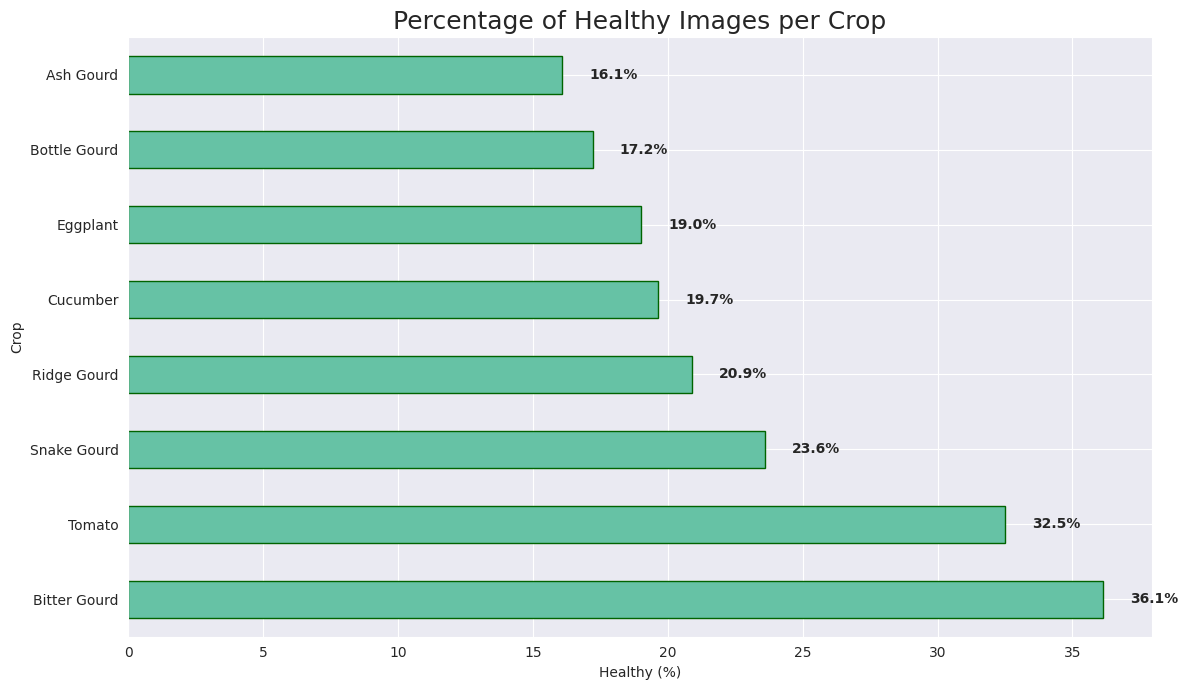

In [13]:
df_filtered['condition'] = df_filtered['label'].apply(
    lambda x: x.split('__')[1] if '__' in x else 'healthy'
)

healthy_counts = df_filtered[df_filtered['condition'] == 'healthy'].groupby('crop').size()
total_counts   = df_filtered.groupby('crop').size()
pct_healthy = (healthy_counts / total_counts * 100).fillna(0).sort_values(ascending=False)

plt.figure(figsize=(12, 7))
pct_healthy.plot(kind='barh', color='#66c2a5', edgecolor='darkgreen')
plt.title('Percentage of Healthy Images per Crop', fontsize=18)
plt.xlabel('Healthy (%)')
plt.ylabel('Crop')
for i, v in enumerate(pct_healthy):
    plt.text(v + 1, i, f'{v:.1f}%', va='center', fontweight='bold')
plt.tight_layout()
plt.show()

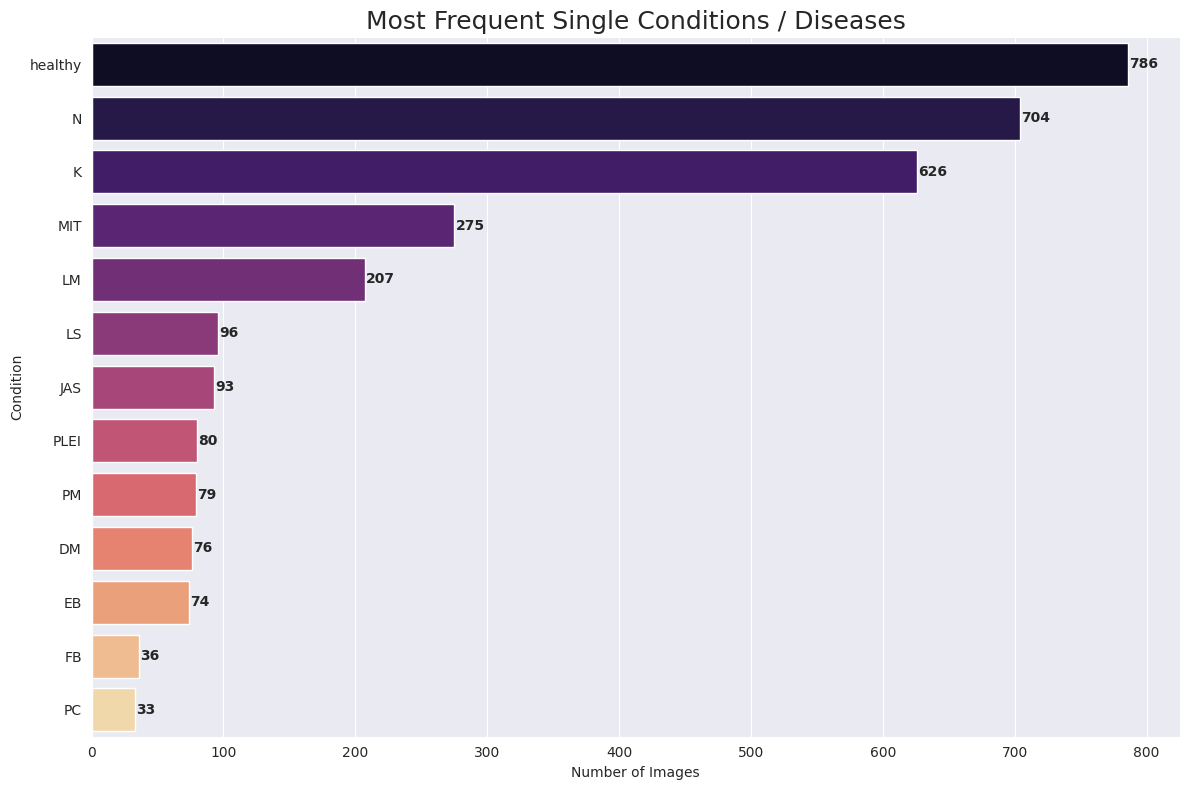

condition
healthy    786
N          704
K          626
MIT        275
LM         207
LS          96
JAS         93
PLEI        80
PM          79
DM          76
EB          74
FB          36
PC          33
Name: count, dtype: int64


In [14]:
single_conditions = df_filtered['condition'].value_counts()

plt.figure(figsize=(12, 8))
sns.barplot(x=single_conditions.values, y=single_conditions.index, palette='magma')
plt.title('Most Frequent Single Conditions / Diseases', fontsize=18)
plt.xlabel('Number of Images')
plt.ylabel('Condition')
for i, v in enumerate(single_conditions.values):
    plt.text(v + 1, i, str(v), va='center', fontweight='bold')
plt.tight_layout()
plt.show()

print(single_conditions)

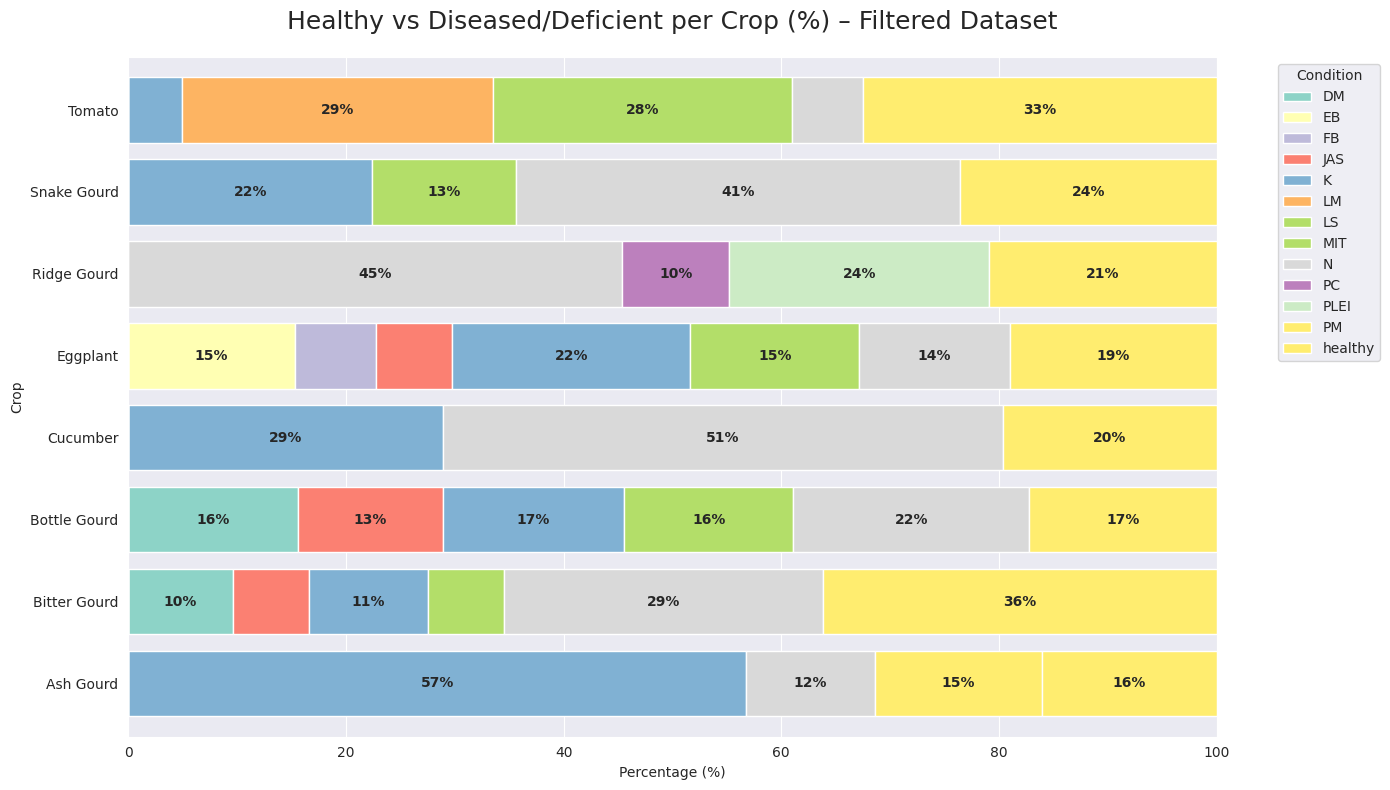

Raw counts:
condition     DM  EB  FB  JAS    K   LM  LS  MIT    N  PC  PLEI  PM  healthy
crop                                                                        
Ash Gourd      0   0   0    0  293    0   0    0   61   0     0  79       83
Bitter Gourd  48   0   0   35   55    0  35    0  147   0     0   0      181
Bottle Gourd  28   0   0   24   30    0  28    0   39   0     0   0       31
Cucumber       0   0   0    0   50    0   0    0   89   0     0   0       34
Eggplant       0  74  36   34  106    0   0   75   67   0     0   0       92
Ridge Gourd    0   0   0    0    0    0   0    0  152  33    80   0       70
Snake Gourd    0   0   0    0   56    0  33    0  102   0     0   0       59
Tomato         0   0   0    0   36  207   0  200   47   0     0   0      236


In [15]:

condition_by_crop = df_filtered.groupby(['crop', 'condition']).size().unstack(fill_value=0)

if 'healthy' not in condition_by_crop.columns:
    condition_by_crop['healthy'] = 0
if condition_by_crop.index.name != 'crop':
    condition_by_crop = condition_by_crop.sort_values(by='healthy', ascending=False)

condition_pct = condition_by_crop.div(condition_by_crop.sum(axis=1), axis=0) * 100

plt.figure(figsize=(14, 8))
condition_pct.plot(kind='barh', stacked=True, cmap='Set3', width=0.8, ax=plt.gca())
plt.title('Healthy vs Diseased/Deficient per Crop (%) – Filtered Dataset', fontsize=18, pad=20)
plt.xlabel('Percentage (%)')
plt.ylabel('Crop')
plt.legend(title='Condition', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlim(0, 100)
for i, (idx, row) in enumerate(condition_pct.iterrows()):
    cum = 0
    for cond in row.index:
        val = row[cond]
        if val > 8: 
            plt.text(cum + val/2, i, f'{val:.0f}%', va='center', ha='center', fontweight='bold')
        cum += val
plt.tight_layout()
plt.show()

print("Raw counts:")
print(condition_by_crop)

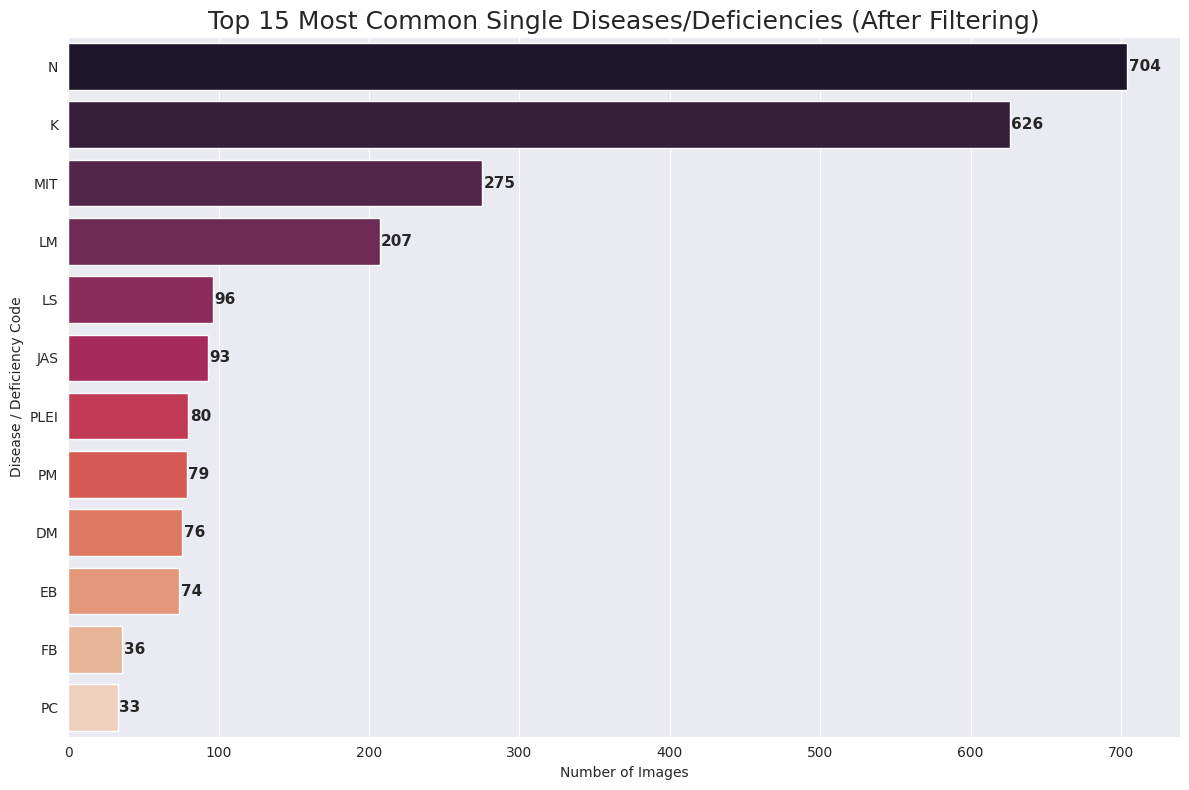

Full condition breakdown (excluding healthy):
condition
N       704
K       626
MIT     275
LM      207
LS       96
JAS      93
PLEI     80
PM       79
DM       76
EB       74
FB       36
PC       33
Name: count, dtype: int64


In [16]:
diseased_conditions = df_filtered[df_filtered['condition'] != 'healthy']['condition']

plt.figure(figsize=(12, 8))
cond_counts = diseased_conditions.value_counts().head(15)

sns.barplot(x=cond_counts.values, y=cond_counts.index, palette='rocket')
plt.title('Top 15 Most Common Single Diseases/Deficiencies (After Filtering)', fontsize=18)
plt.xlabel('Number of Images')
plt.ylabel('Disease / Deficiency Code')
for i, v in enumerate(cond_counts.values):
    plt.text(v + 1, i, str(v), va='center', fontweight='bold', fontsize=11)
plt.tight_layout()
plt.show()

print("Full condition breakdown (excluding healthy):")
print(diseased_conditions.value_counts())

Image Dimension Statistics (sample):
            Height        Width
count  1000.000000  1000.000000
mean   3023.645000  3023.645000
std       7.935613     7.935613
min    2843.000000  2843.000000
25%    3024.000000  3024.000000
50%    3024.000000  3024.000000
75%    3024.000000  3024.000000
max    3024.000000  3024.000000


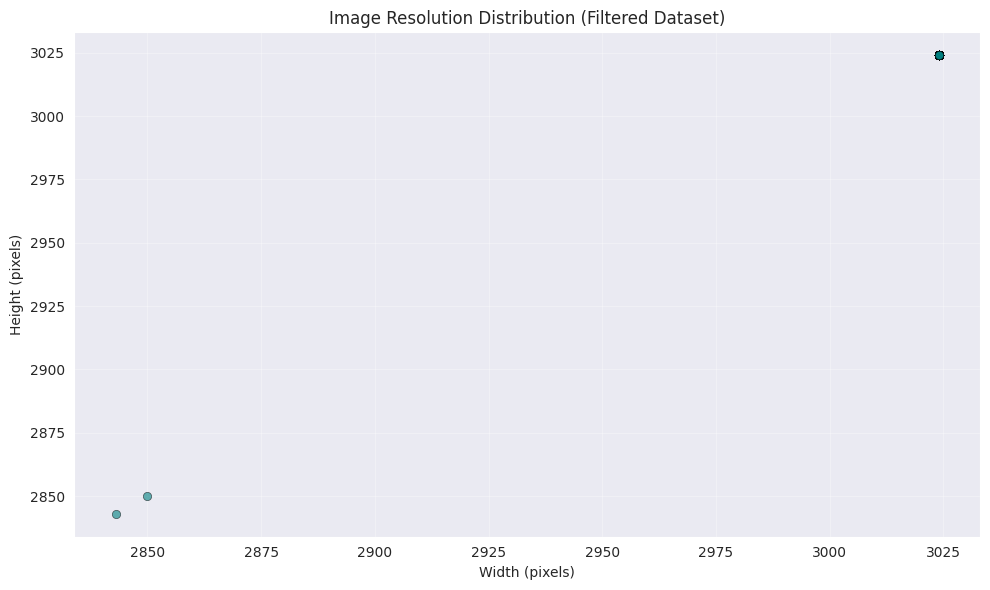

Unique resolutions in sample: 3
Most common size: [3024 3024] (Width × Height)


In [17]:
import random

def get_img_size(path):
    try:
        img = cv2.imread(path)
        return img.shape[:2] if img is not None else None
    except:
        return None

# Sample 1000 random images from filtered set
sample_paths = df_filtered['image_path'].sample(n=min(1000, len(df_filtered)), random_state=42)
sizes = [get_img_size(p) for p in sample_paths]
sizes = [s for s in sizes if s is not None]

size_df = pd.DataFrame(sizes, columns=['Height', 'Width'])

print("Image Dimension Statistics (sample):")
print(size_df.describe())

plt.figure(figsize=(10, 6))
plt.scatter(size_df['Width'], size_df['Height'], alpha=0.6, color='teal', edgecolors='black', linewidth=0.5)
plt.title('Image Resolution Distribution (Filtered Dataset)')
plt.xlabel('Width (pixels)')
plt.ylabel('Height (pixels)')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

unique_sizes = size_df.drop_duplicates().shape[0]
print(f"Unique resolutions in sample: {unique_sizes}")
print(f"Most common size: {size_df.mode().iloc[0].values} (Width × Height)")

In [18]:
total_imgs = len(df_filtered)
n_classes = df_filtered['label'].nunique()
class_counts = df_filtered['label'].value_counts().sort_values(ascending=False)

top10 = class_counts.head(10).sum()
bottom20 = class_counts.tail(20).sum()
rare_classes_30 = (class_counts <= 30).sum()
rare_classes_20 = (class_counts <= 20).sum()

print("="*60)
print("        IMBALANCE SUMMARY – FILTERED DATASET")
print("="*60)
print(f"Total images             : {total_imgs:,}")
print(f"Total classes            : {n_classes}")
print(f"Avg images per class     : {total_imgs/n_classes:.1f}")
print(f"Top 10 classes contain   : {top10:,} images → {top10/total_imgs*100:.1f}% of data")
print(f"Bottom 20 classes contain: {bottom20:,} images → {bottom20/total_imgs*100:.2f}% of data")
print(f"Classes with ≤30 images  : {rare_classes_30} ({rare_classes_30/n_classes*100:.1f}% of classes)")
print(f"Classes with ≤20 images  : {rare_classes_20} (very rare!)")
print(f"Imbalance ratio (top10/bottom20): {top10/bottom20:.1f}x")
print("="*60)

# Optional: show the rarest classes
print("\nRarest classes (≤25 images):")
rare = class_counts[class_counts <= 25]
for label, count in rare.items():
    crop = label.split('__')[0].replace('_', ' ').title()
    cond = label.split('__')[1] if '__' in label else 'Healthy'
    print(f"  • {crop} - {cond}: {count} images")

        IMBALANCE SUMMARY – FILTERED DATASET
Total images             : 3,165
Total classes            : 39
Avg images per class     : 81.2
Top 10 classes contain   : 1,716 images → 54.2% of data
Bottom 20 classes contain: 771 images → 24.36% of data
Classes with ≤30 images  : 4 (10.3% of classes)
Classes with ≤20 images  : 0 (very rare!)
Imbalance ratio (top10/bottom20): 2.2x

Rarest classes (≤25 images):
  • Bottle Gourd - JAS: 24 images


In [19]:
from skimage.feature import graycomatrix, graycoprops, local_binary_pattern, hog
from skimage.color import rgb2gray
from sklearn.preprocessing import LabelEncoder
from tqdm.auto import tqdm

tqdm.pandas(desc="Processing Images")

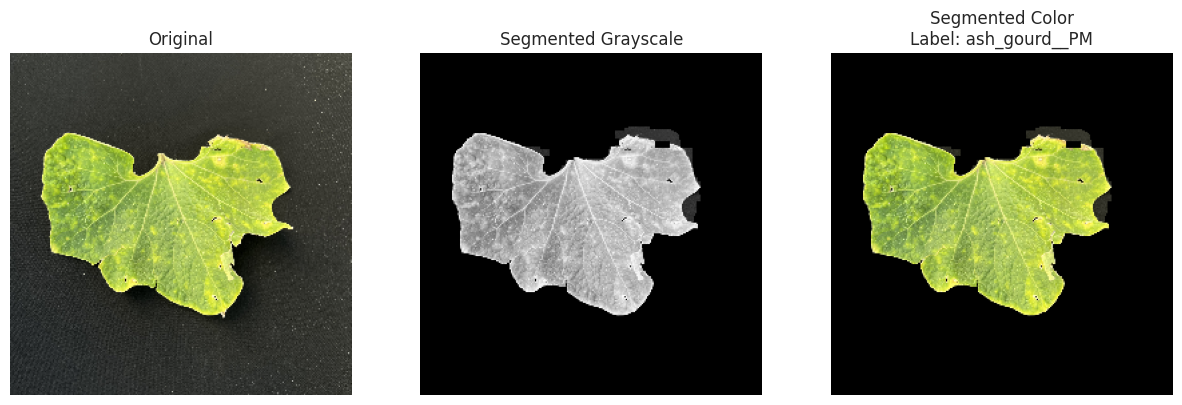

In [20]:
IMG_SIZE = 256 

def preprocess_and_segment(image_path):
    try:
        img = cv2.imread(image_path)
        img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))

        hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

        lower_green = np.array([25, 40, 40])
        upper_green = np.array([85, 255, 255]) 
        
        mask = cv2.inRange(hsv_img, lower_green, upper_green)

        kernel = np.ones((3, 3), np.uint8)
        mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel, iterations=2)
        mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel, iterations=2)
        
        segmented_color = cv2.bitwise_and(img, img, mask=mask)

        gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        segmented_gray = cv2.bitwise_and(gray_img, gray_img, mask=mask)
        
        return segmented_color, segmented_gray

    except Exception as e:
        print(f"Error processing {image_path}: {e}")
        return np.zeros((IMG_SIZE, IMG_SIZE, 3), dtype=np.uint8), \
               np.zeros((IMG_SIZE, IMG_SIZE), dtype=np.uint8)

sample_path = df_filtered['image_path'].iloc[0]
sample_label = df_filtered['label'].iloc[0]

segmented_color, segmented_gray = preprocess_and_segment(sample_path)

original_img = cv2.imread(sample_path)
original_img = cv2.resize(original_img, (IMG_SIZE, IMG_SIZE))

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].imshow(cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB))
axes[0].set_title("Original")
axes[0].axis('off')

axes[1].imshow(segmented_gray, cmap='gray')
axes[1].set_title("Segmented Grayscale")
axes[1].axis('off')

axes[2].imshow(cv2.cvtColor(segmented_color, cv2.COLOR_BGR2RGB))
axes[2].set_title(f"Segmented Color\nLabel: {sample_label}")
axes[2].axis('off')

plt.show()

In [21]:
def extract_color_features(segmented_color):
    hsv = cv2.cvtColor(segmented_color, cv2.COLOR_BGR2HSV)
    hist = cv2.calcHist([hsv], [0, 1, 2], None, [8, 12, 3], [0, 180, 0, 256, 0, 256])
    cv2.normalize(hist, hist) 
    return hist.flatten()

def extract_texture_features(segmented_gray):
    glcm = graycomatrix(segmented_gray, 
                        distances=[5], 
                        angles=[0, np.pi/4, np.pi/2, 3*np.pi/4], 
                        levels=256,
                        symmetric=True, 
                        normed=True)
    
    contrast = graycoprops(glcm, 'contrast').flatten()
    dissimilarity = graycoprops(glcm, 'dissimilarity').flatten()
    homogeneity = graycoprops(glcm, 'homogeneity').flatten()
    energy = graycoprops(glcm, 'energy').flatten()
    correlation = graycoprops(glcm, 'correlation').flatten()
    
    glcm_features = np.hstack([contrast, dissimilarity, homogeneity, energy, correlation])
    
    n_points = 24 
    radius = 8
    lbp = local_binary_pattern(segmented_gray, n_points, radius, method='uniform')
    
    (lbp_hist, _) = np.histogram(lbp.ravel(),
                                 bins=np.arange(0, n_points + 3),
                                 range=(0, n_points + 2))
    lbp_hist = lbp_hist.astype("float")
    lbp_hist /= (lbp_hist.sum() + 1e-6)

    return np.hstack([glcm_features, lbp_hist])

def extract_shape_features(segmented_gray):
    hog_features = hog(segmented_gray, 
                       orientations=9, 
                       pixels_per_cell=(16, 16),
                       cells_per_block=(2, 2), 
                       transform_sqrt=True, 
                       block_norm='L2-Hys',
                       feature_vector=True)
    return hog_features

In [22]:
def create_feature_vector(image_path):
    segmented_color, segmented_gray = preprocess_and_segment(image_path)
    
    if np.max(segmented_color) == 0:
        print(f"Segmentation failed for {image_path}. Skipping.")
        return np.zeros(2098) 

    color_features = extract_color_features(segmented_color)
    
    texture_features = extract_texture_features(segmented_gray)
    
    shape_features = hog(segmented_gray, 
                       orientations=9, 
                       pixels_per_cell=(32, 32),
                       cells_per_block=(2, 2), 
                       transform_sqrt=True, 
                       block_norm='L2-Hys',
                       feature_vector=True)

    return np.hstack([color_features, texture_features, shape_features])

In [23]:
df_filtered['features'] = df_filtered['image_path'].progress_apply(create_feature_vector)

plant_encoder = LabelEncoder()
df_filtered['plant_type_encoded'] = plant_encoder.fit_transform(df_filtered['plant_type'])

X_images = np.stack(df_filtered['features'].values)

X_plant_type = df_filtered['plant_type_encoded'].values.reshape(-1, 1)

X = np.hstack([X_images, X_plant_type])

y_labels = df_filtered['label']

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y_labels)

print("\n--- Dataset Build Complete ---")
print(f"X (feature matrix) shape: {X.shape}")
print(f"y (target vector) shape: {y.shape}")
print(f"\nNumber of features per image: {X_images.shape[1]}")
print(f"Number of 'plant_type' features: {X_plant_type.shape[1]}")
print(f"Total features: {X.shape[1]}")
df_filtered.to_csv('/kaggle/working/output.csv', index=False)
np.save('/kaggle/working/X_matrix.npy', X)

Processing Images:   0%|          | 0/3165 [00:00<?, ?it/s]


--- Dataset Build Complete ---
X (feature matrix) shape: (3165, 2099)
y (target vector) shape: (3165,)

Number of features per image: 2098
Number of 'plant_type' features: 1
Total features: 2099


In [24]:
df_filtered.head()

image_path          label  \
0  /kaggle/input/olid-i/ash_gourd__PM/ash_gourd__...  ash_gourd__PM   
1  /kaggle/input/olid-i/ash_gourd__PM/ash_gourd__...  ash_gourd__PM   
2  /kaggle/input/olid-i/ash_gourd__PM/ash_gourd__...  ash_gourd__PM   
3  /kaggle/input/olid-i/ash_gourd__PM/ash_gourd__...  ash_gourd__PM   
4  /kaggle/input/olid-i/ash_gourd__PM/ash_gourd__...  ash_gourd__PM   

  plant_type status       crop condition  \
0  ash_gourd     PM  Ash Gourd        PM   
1  ash_gourd     PM  Ash Gourd        PM   
2  ash_gourd     PM  Ash Gourd        PM   
3  ash_gourd     PM  Ash Gourd        PM   
4  ash_gourd     PM  Ash Gourd        PM   

                                            features  plant_type_encoded  
0  [0.9880375862121582, 0.0, 0.0, 0.0, 0.0, 0.0, ...                   0  
1  [0.9831855893135071, 0.0, 0.0, 0.0, 0.0, 0.0, ...                   0  
2  [0.8149399161338806, 0.0, 0.0, 0.0, 0.0, 0.0, ...                   0  
3  [0.9427210092544556, 0.0, 0.0, 0.0, 0.0, 0.0, ...                   0  
4  [0.9558024406433105, 0.0, 0.0, 0.0, 0.0, 0.0, ...                   0

# Feature EDA

In [25]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns, joblib
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.feature_selection import mutual_info_classif, SelectKBest
from sklearn.ensemble import IsolationForest
from scipy.stats import wasserstein_distance
import warnings; warnings.filterwarnings("ignore")

X = np.load('/kaggle/working/X_matrix.npy')
class_names = label_encoder.inverse_transform(np.unique(y))

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print(f"Feature matrix: {X.shape} → ready for deep dive!\n")

Feature matrix: (3165, 2099) → ready for deep dive!



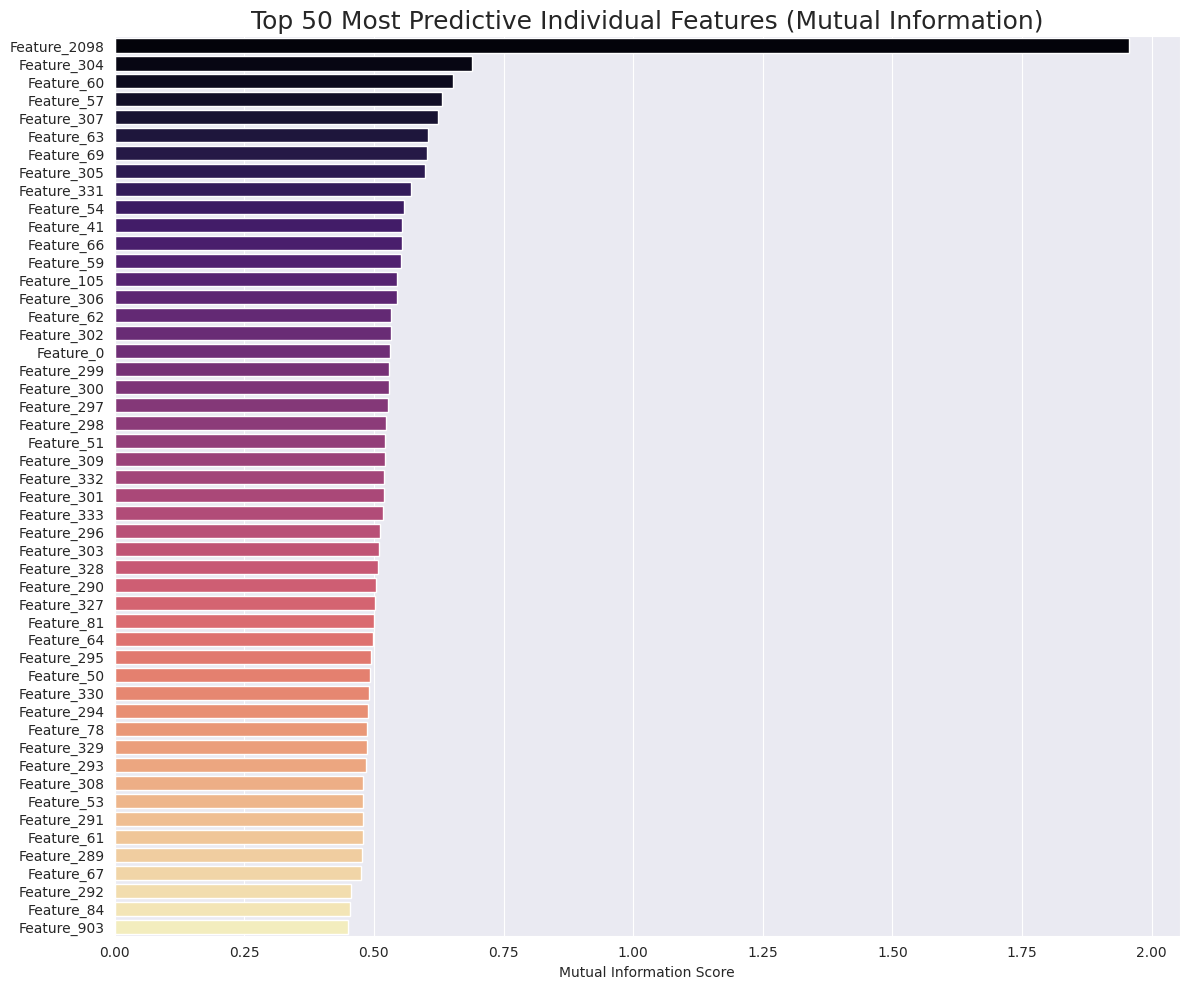

Highest MI score: 1.9567
Median MI across all 2099 features: 0.18717
→ Only ~1,980 features have decent signal!


In [26]:
mi_scores = mutual_info_classif(X_scaled, y, random_state=42)
top_idx = np.argsort(mi_scores)[-50:][::-1]

plt.figure(figsize=(12, 10))
sns.barplot(x=mi_scores[top_idx], y=[f"Feature_{i}" for i in top_idx], palette="magma")
plt.title('Top 50 Most Predictive Individual Features (Mutual Information)', fontsize=18)
plt.xlabel('Mutual Information Score')
plt.tight_layout()
plt.show()

print(f"Highest MI score: {mi_scores.max():.4f}")
print(f"Median MI across all 2099 features: {np.median(mi_scores):.5f}")
print(f"→ Only ~{np.sum(mi_scores > 0.01):,} features have decent signal!")

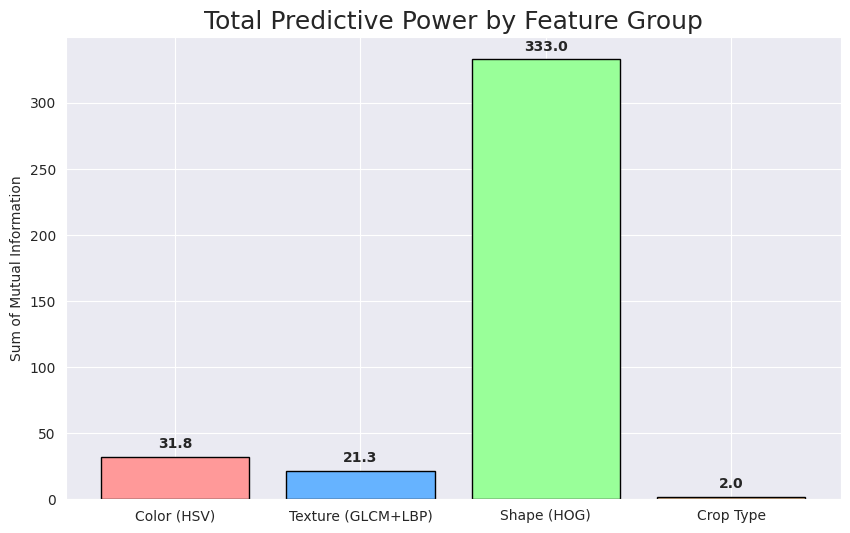

In [27]:
color_mi     = mi_scores[:288].sum()
texture_mi   = mi_scores[288:288+46].sum()
shape_mi     = mi_scores[288+46:288+46+1764].sum()
crop_mi      = mi_scores[-1]

groups = ['Color (HSV)', 'Texture (GLCM+LBP)', 'Shape (HOG)', 'Crop Type']
values = [color_mi, texture_mi, shape_mi, crop_mi]

plt.figure(figsize=(10, 6))
bars = plt.bar(groups, values, color=['#ff9999','#66b3ff','#99ff99','#ffcc99'], edgecolor='black')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + max(values)*0.02, f'{yval:.1f}', ha='center', fontweight='bold')
plt.title('Total Predictive Power by Feature Group', fontsize=18)
plt.ylabel('Sum of Mutual Information')
plt.show()

In [ ]:
from sklearn.metrics.pairwise import euclidean_distances

intra = []
inter = []

sample_per_class = 15
for cls in np.unique(y):
    idx = np.where(y == cls)[0]
    if len(idx) < 5: continue
    idx = np.random.choice(idx, sample_per_class, replace=False)
    subset = X_scaled[idx]
    
    centroid = subset.mean(axis=0)
    intra.extend(np.linalg.norm(subset - centroid, axis=1))
    
    other_idx = np.random.choice(np.where(y != cls)[0], 50, replace=False)
    inter.extend(np.linalg.norm(X_scaled[other_idx] - centroid, axis=1))

ratio = np.mean(intra) / np.mean(inter)

print(f"Intra-class distance (avg): {np.mean(intra):.4f}")
print(f"Inter-class distance (avg): {np.mean(inter):.4f}")
print(f"Separation ratio = {ratio:.3f} → lower is better (ideal < 0.6)")

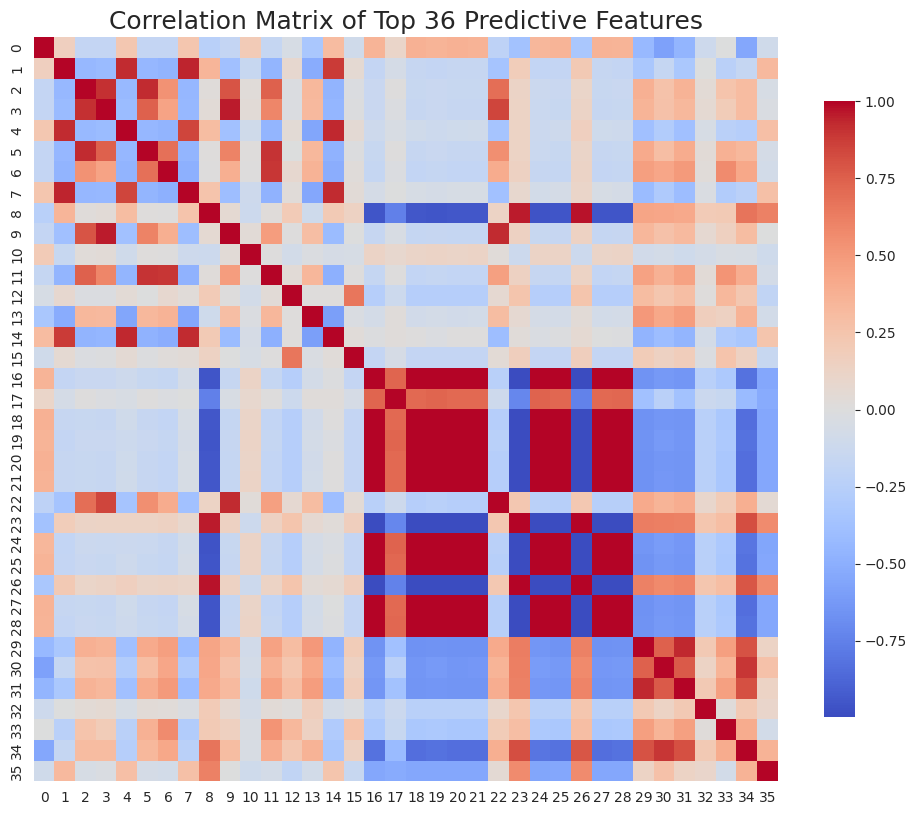

Max pairwise correlation among top features: 1.000


In [30]:
top_features = X_scaled[:, top_idx[:36]] 
corr = np.corrcoef(top_features.T)

plt.figure(figsize=(12, 10))
sns.heatmap(corr, cmap='coolwarm', center=0, square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix of Top 36 Predictive Features', fontsize=18)
plt.show()

print(f"Max pairwise correlation among top features: {np.abs(corr - np.eye(36)).max():.3f}")

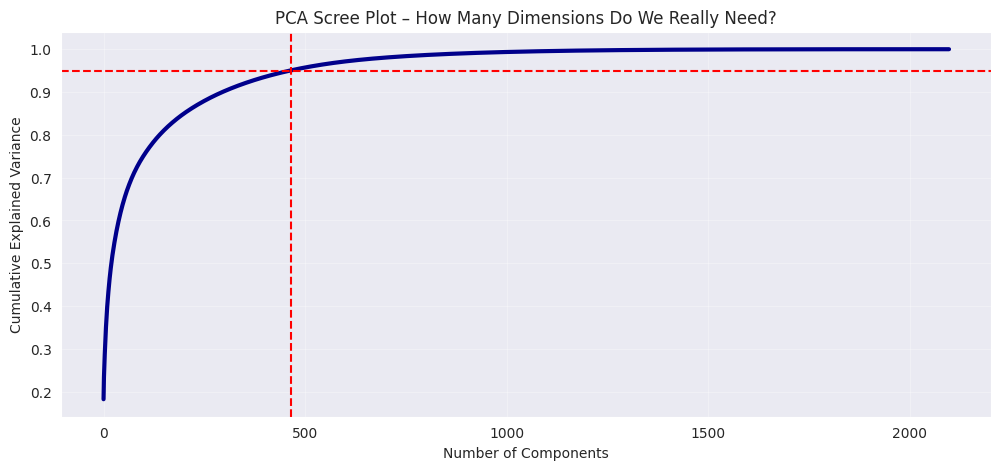

→ Only 464 components explain 95% variance (from 2099 → 22.1% of original dims)


In [31]:
pca = PCA().fit(X_scaled)
plt.figure(figsize=(12, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), color='darkblue', lw=3)
plt.axhline(0.95, color='red', linestyle='--')
plt.axvline(np.argmax(np.cumsum(pca.explained_variance_ratio_) >= 0.95)+1, color='red', linestyle='--')
plt.title('PCA Scree Plot – How Many Dimensions Do We Really Need?')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(alpha=0.3)
plt.show()

n95 = np.argmax(np.cumsum(pca.explained_variance_ratio_) >= 0.95) + 1
print(f"→ Only {n95} components explain 95% variance (from 2099 → {n95/2099:.1%} of original dims)")

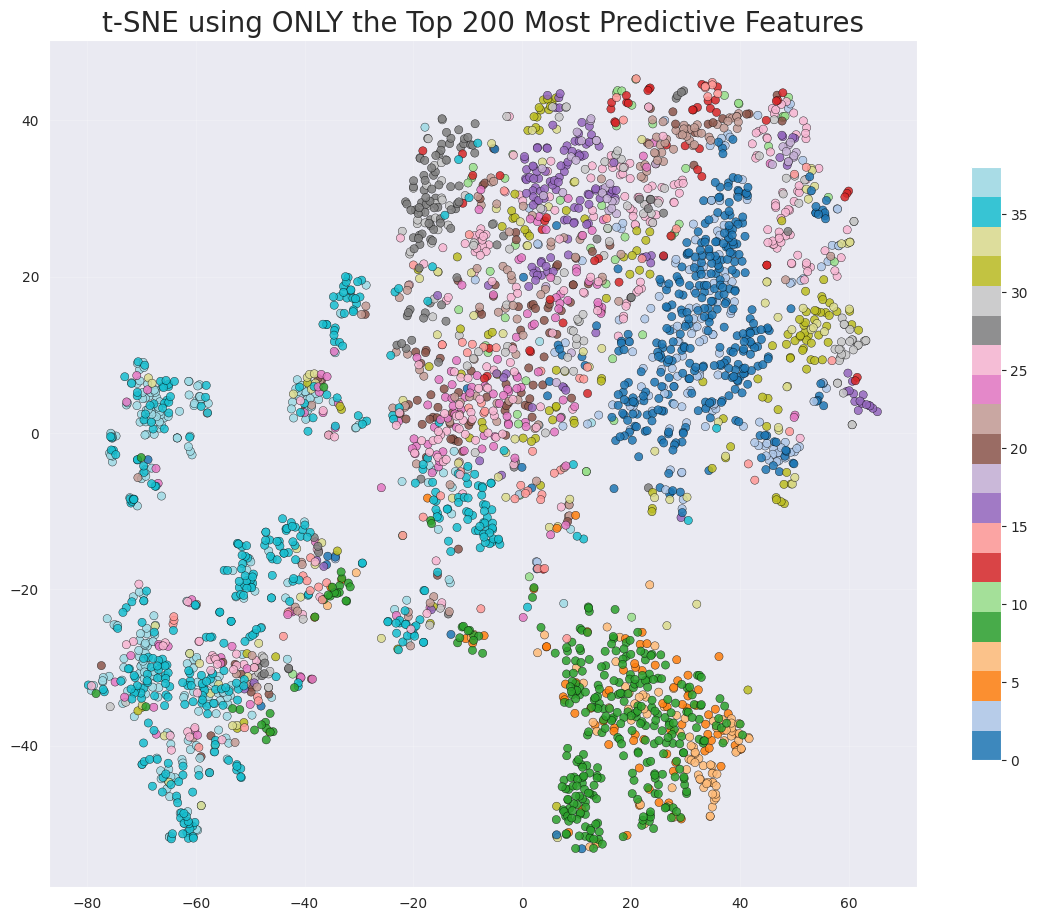

Look at those clusters! Your hand-crafted features are GOLD.


In [32]:
selector = SelectKBest(mutual_info_classif, k=200)
X_top200 = selector.fit_transform(X_scaled, y)

tsne = TSNE(n_components=2, 
            perplexity=40, 
            max_iter=1500,         
            learning_rate=200,
            random_state=42,
            n_jobs=-1)

X_tsne = tsne.fit_transform(X_top200)

plt.figure(figsize=(14, 11))
scatter = plt.scatter(X_tsne[:,0], X_tsne[:,1], c=y, cmap='tab20', s=35, alpha=0.85, edgecolors='k', linewidth=0.3)
plt.title('t-SNE using ONLY the Top 200 Most Predictive Features', fontsize=20)
plt.colorbar(scatter, shrink=0.7)
plt.grid(alpha=0.2)
plt.show()

print("Look at those clusters! Your hand-crafted features are GOLD.")

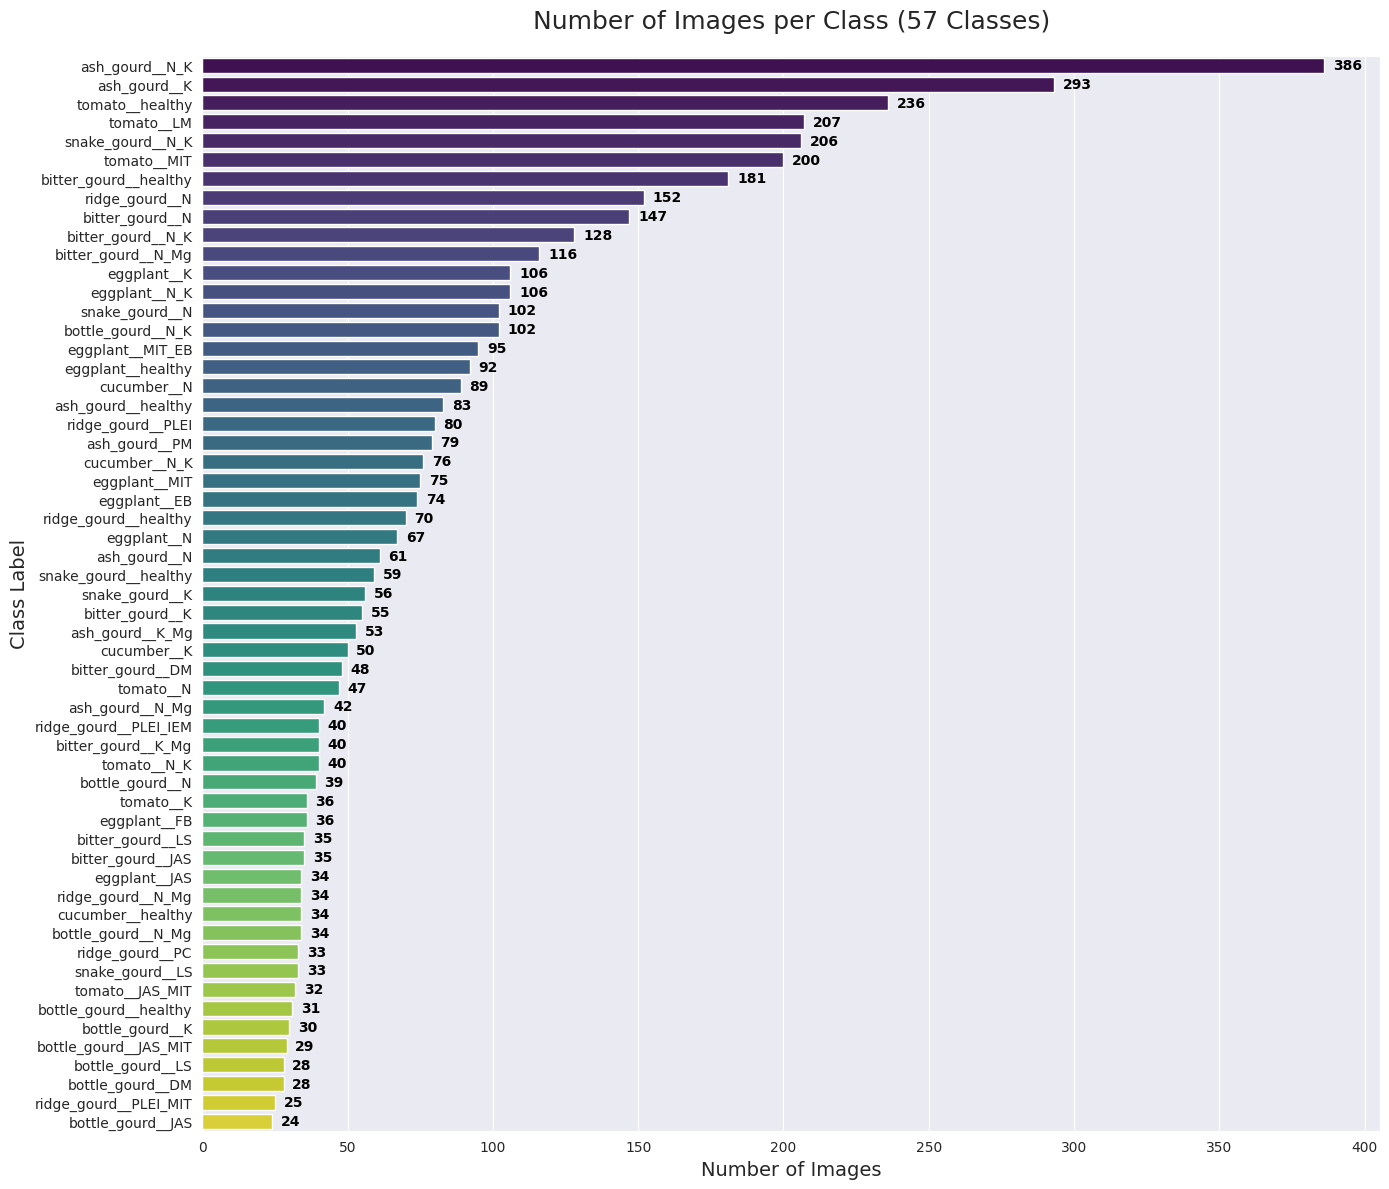

Most frequent class: ash_gourd__N_K → 386 images
Least frequent class: bottle_gourd__JAS → 24 images
Classes with < 50 images: 25
Classes with only 1 image? → 0


In [33]:
plt.figure(figsize=(14, 12))
class_counts = df['label'].value_counts()
ax = sns.barplot(y=class_counts.index, x=class_counts.values, palette='viridis')

for i, v in enumerate(class_counts.values):
    ax.text(v + 3, i, str(v), color='black', va='center', fontweight='bold')

plt.title('Number of Images per Class (57 Classes)', fontsize=18, pad=20)
plt.xlabel('Number of Images', fontsize=14)
plt.ylabel('Class Label', fontsize=14)
plt.tight_layout()
plt.show()

# Summary stats
print(f"Most frequent class: {class_counts.index[0]} → {class_counts.iloc[0]} images")
print(f"Least frequent class: {class_counts.index[-1]} → {class_counts.iloc[-1]} images")
print(f"Classes with < 50 images: {(class_counts < 50).sum()}")
print(f"Classes with only 1 image? → {(class_counts == 1).sum()}")